In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
#import json
#import datetime
import seaborn as sns
#import matplotlib as mlp
import matplotlib.pyplot as plt
#from datetime import datetime
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

# import dataset
dfPhiladelphia = pd.read_csv("data/tmp/dfPhiladelphia.csv.zip")
dfPhiladelphia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733481 entries, 0 to 733480
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               733481 non-null  object 
 1   end_date                 733481 non-null  object 
 2   start_time_hourly        733481 non-null  int64  
 3   end_time_hourly          733481 non-null  int64  
 4   start_station_id         733481 non-null  int64  
 5   end_station_id           733481 non-null  int64  
 6   start_latitude           733481 non-null  float64
 7   start_longitude          733481 non-null  float64
 8   end_latitude             733481 non-null  float64
 9   end_longitude            733481 non-null  float64
 10  min_temp                 733481 non-null  float64
 11  max_temp                 733481 non-null  float64
 12  isPrecip                 733481 non-null  bool   
 13  user_type                733481 non-null  object 
 14  dayO

# 2. Descriptive Analytics

In [2]:
palette = "Spectral"

## 2.1 Temporal Demand Patterns and Seasonality

In this section, we will:
- Demonstrate how fleet usage varies during a day, a week and the year. 
- What patterns do you observe? Explain.

In [3]:
#dfPhiladelphia.mean()

In [4]:
#dfPhiladelphia["numOfRentedBikes"].describe()

### 2.1.1 Fleet usage variety per day

In [5]:
######## ((MAYBE ALSO FOR Percentage of used bikes))

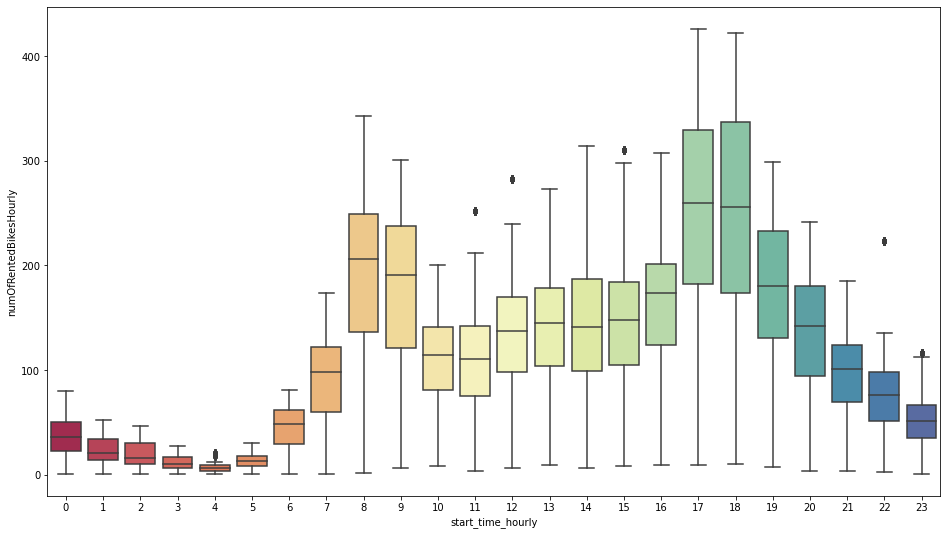

In [7]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Tagsüber () wird mehr ausgeliehen, als Nachts ()
- 17-18 und 8-9 scheint was zu sein, vlt. Berufsverkehr? Wir werden uns das anscvhauen :D

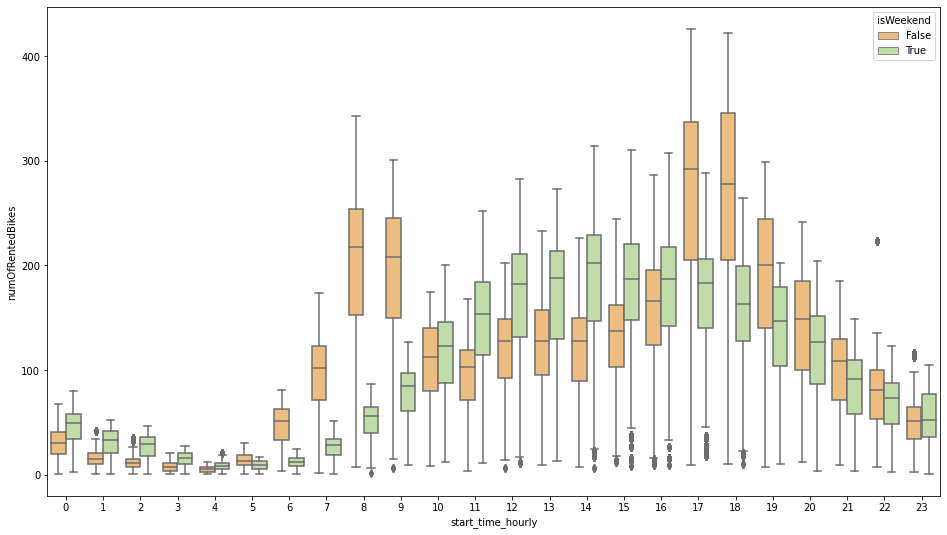

In [7]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isWeekend")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- In this graph we observe a rise in Fahradleih zum Berufsverkehr (isWeekend = False) zu den Zeiten 6,7,8,9,17,18
- Am Wochenende (isWeekend = True) ist generell am Tag 11 bis 16/17 Uhr mehr verleih (Mehr Freizeit)
- Partyfahrer Nachts am Wochende?? -> Next plot

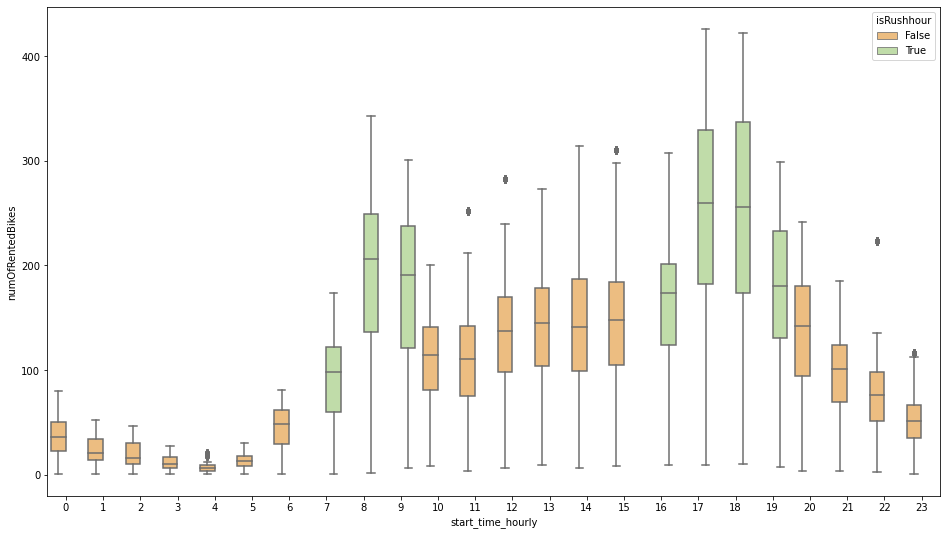

In [8]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isRushhour")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

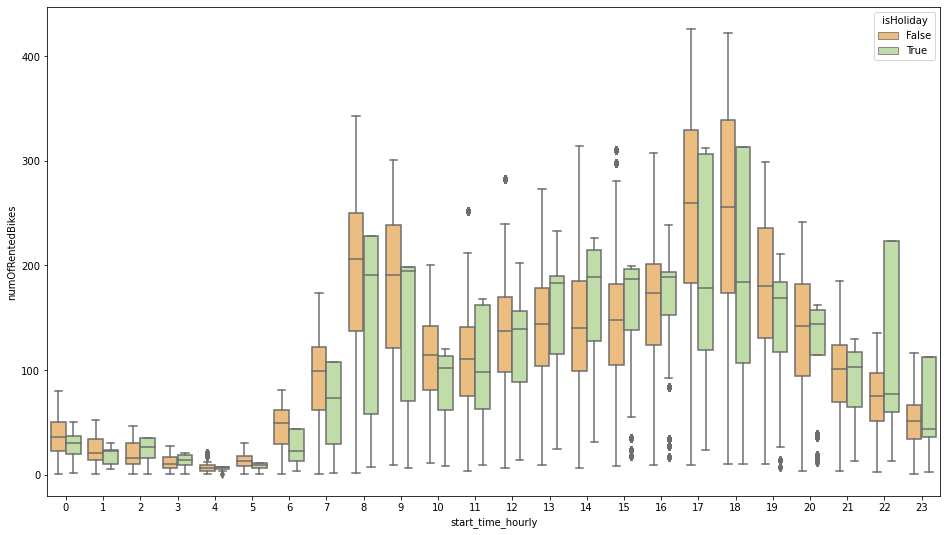

In [9]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isHoliday")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG AUCH FÜR Warum keine Unterschiede

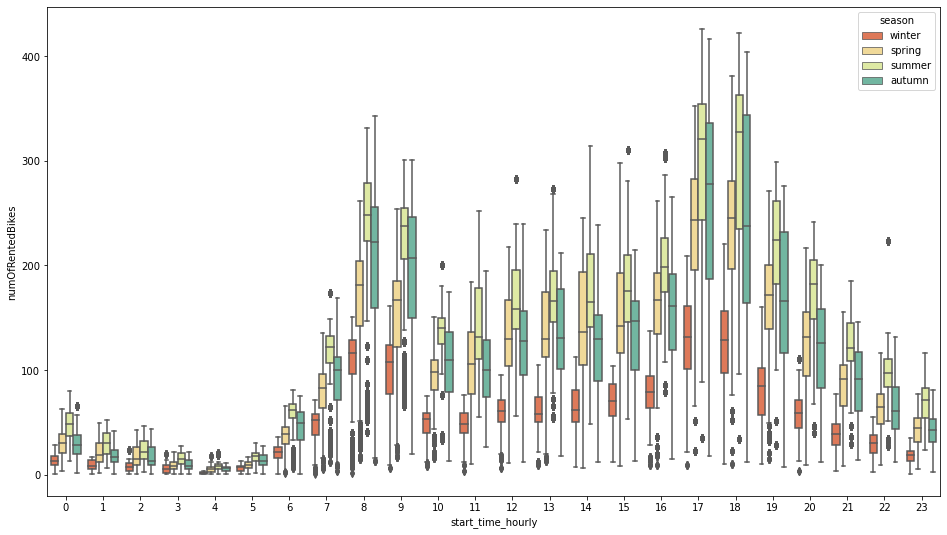

In [10]:
###### vielleicht Linien über mean
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="season")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- Nutzung ist über seasons über UHrzeit gleich, aber weniger im Winter

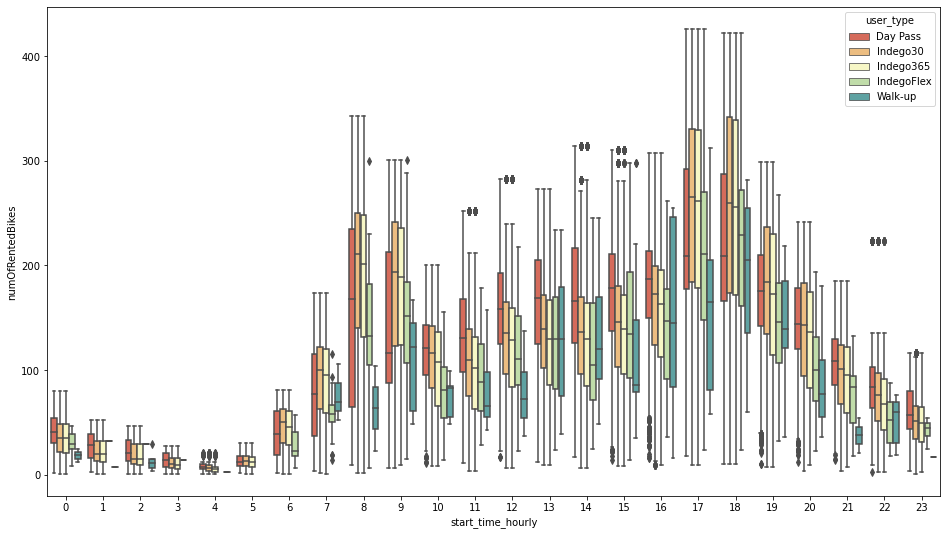

In [11]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="user_type", hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

Tarife erklären, z.b. Day Ticket um 8, weil Bahn weg

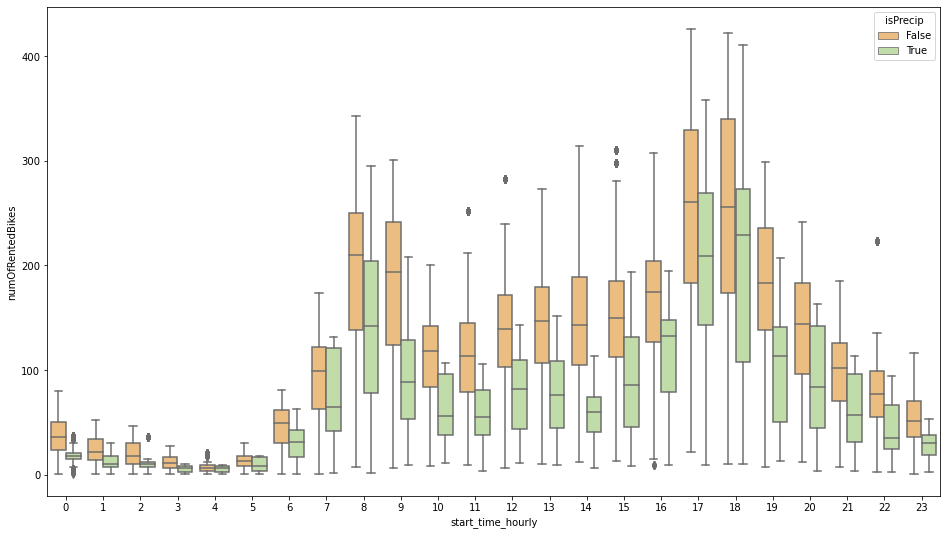

In [14]:
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette, hue="isPrecip")
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

ERKLÄRUNG

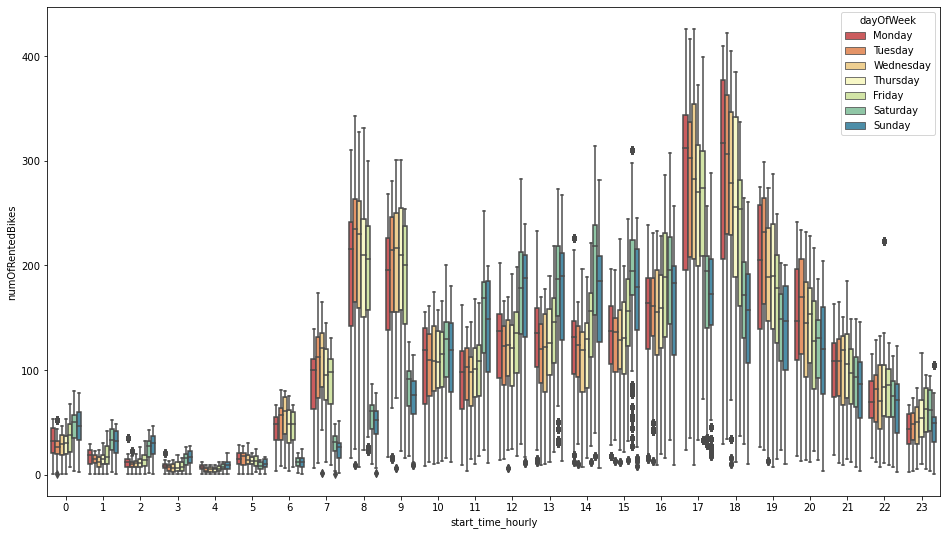

In [15]:
### ALS ÜBERSICHTLICHEN ABSCHLUSS + Überleitung zu Week
sns.boxplot(x="start_time_hourly",y="numOfRentedBikesHourly",data=dfPhiladelphia,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

NETTER TEXT

### 2.1.2 Fleet usage variety per week

In [ ]:
# initialize new target_value y="numOfRentedBikesDaily"

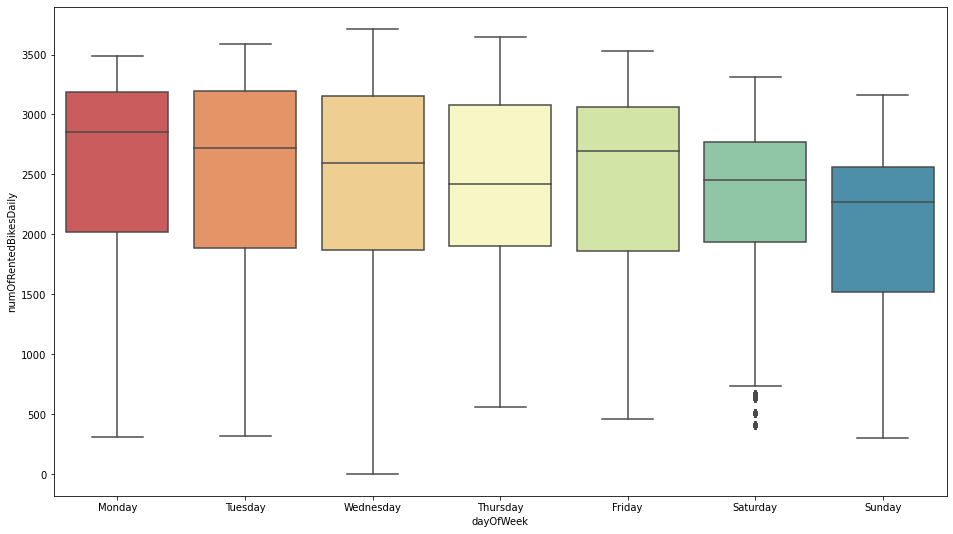

In [8]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

- liegt vlt. am Abomodell

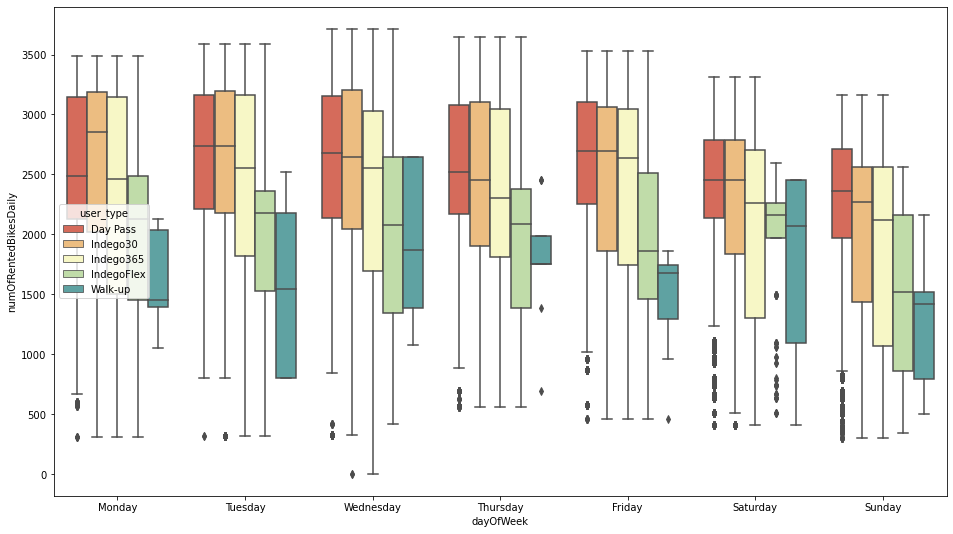

In [9]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="user_type",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue_order=["Day Pass","Indego30","Indego365","IndegoFlex","Walk-up"])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

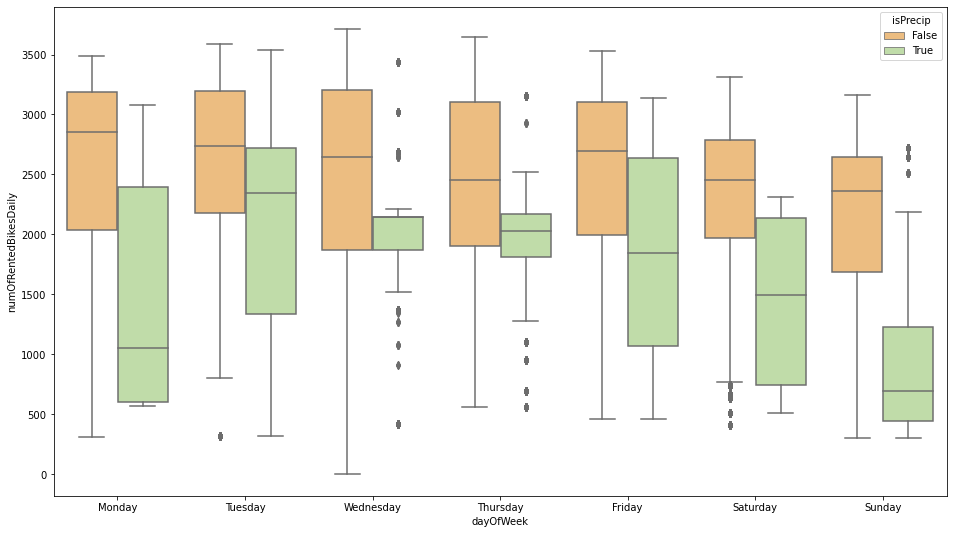

In [10]:
sns.boxplot(x="dayOfWeek",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette,hue="isPrecip",order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [ ]:
#SHOWOFF ORDER
#sns.boxplot(x="start_time_hourly",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette,order=[22,23,0,1,2,3,4,5,6],hue="isWeekend")
#fig = plt.gcf()
#fig.set_size_inches(16, 9)
#plt.show()

### 2.1.2 Fleet usage variety during the year

In [20]:
dfPhiladelphia

,start_date,end_date,start_time_hourly,end_time_hourly,start_station_id,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,...,user_type,dayOfWeek,isWeekend,season,isHoliday,isRushhour,tripduration_sec,numOfRentedBikes,start_station_name,end_station_name
0,2019-01-01,2019-01-01,0,0,3049,3007,39.94509,-75.142500,39.945170,-75.159930,...,Indego30,Tuesday,False,winter,True,False,480,2,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01,2019-01-01,0,1,3005,3007,39.94733,-75.144030,39.945170,-75.159930,...,Day Pass,Tuesday,False,winter,True,False,420,2,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01,2019-01-01,1,1,3166,3169,39.97195,-75.134450,39.953820,-75.142630,...,Indego30,Tuesday,False,winter,True,False,780,8,Frankford & Belgrade,2nd & Race
3,2019-01-01,2019-01-01,1,1,3058,3103,39.96716,-75.170010,39.977139,-75.179398,...,Indego30,Tuesday,False,winter,True,False,540,8,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01,2019-01-01,1,1,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,Indego30,Tuesday,False,winter,True,False,720,8,17th & Sansom,4th & Bainbridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733476,2019-12-31,2020-01-01,23,0,3192,3070,39.96207,-75.141113,39.960620,-75.139830,...,Indego365,Tuesday,False,winter,False,False,2778,28,2nd & Fairmount,"Spring Garden Station, MFL"
733477,2019-12-31,2020-01-01,23,0,3086,3025,39.94019,-75.166910,39.937240,-75.161200,...,Indego30,Tuesday,False,winter,False,False,227,28,Broad & Christian,11th & Washington
733478,2020-01-01,2020-01-01,0,0,3052,3068,39.94732,-75.156950,39.935490,-75.167110,...,Indego30,Wednesday,False,winter,True,False,449,3,9th & Locust,Broad & Federal
733479,2020-01-01,2020-01-01,0,0,3182,3028,39.95081,-75.169530,39.940610,-75.149580,...,Indego365,Wednesday,False,winter,True,False,527,3,17th & Sansom,4th & Bainbridge


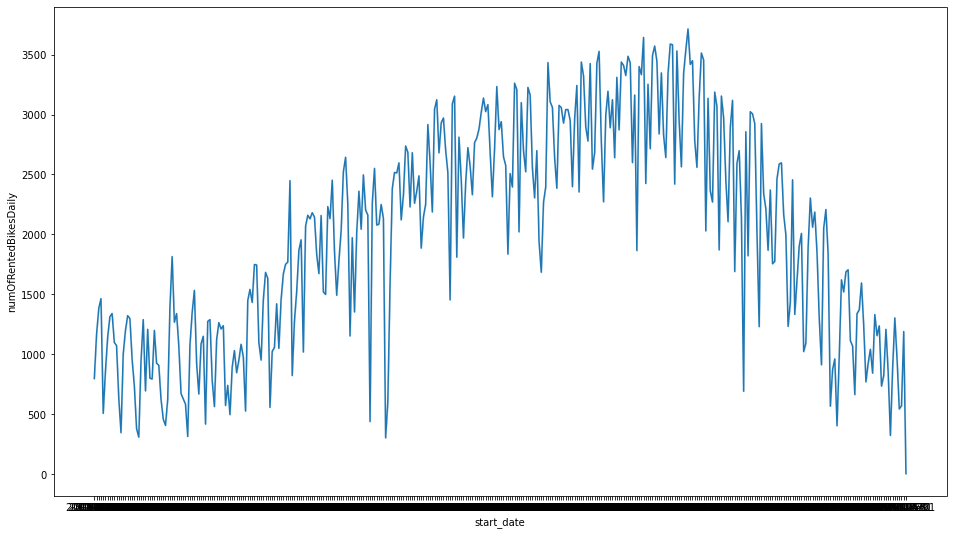

In [11]:
sns.lineplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

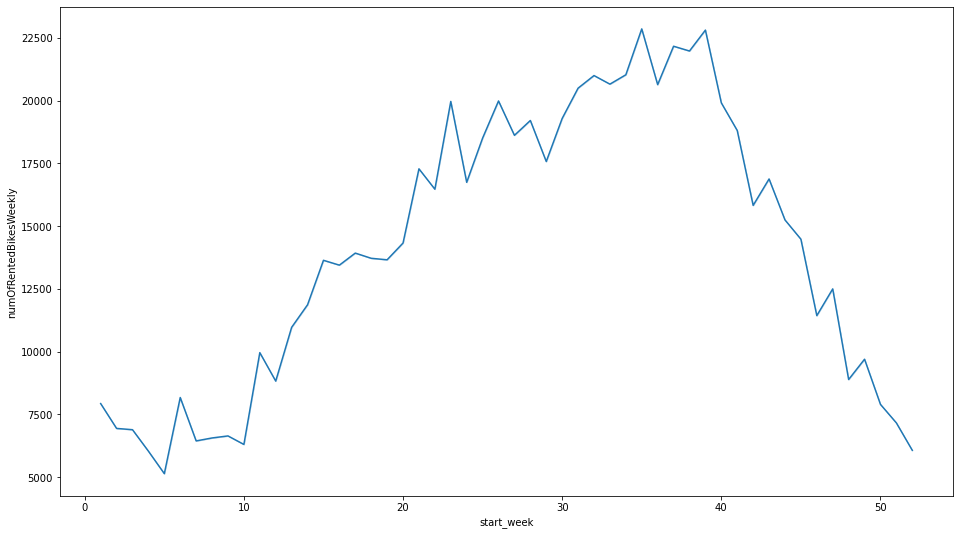

In [13]:
sns.lineplot(x="start_week",y="numOfRentedBikesWeekly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

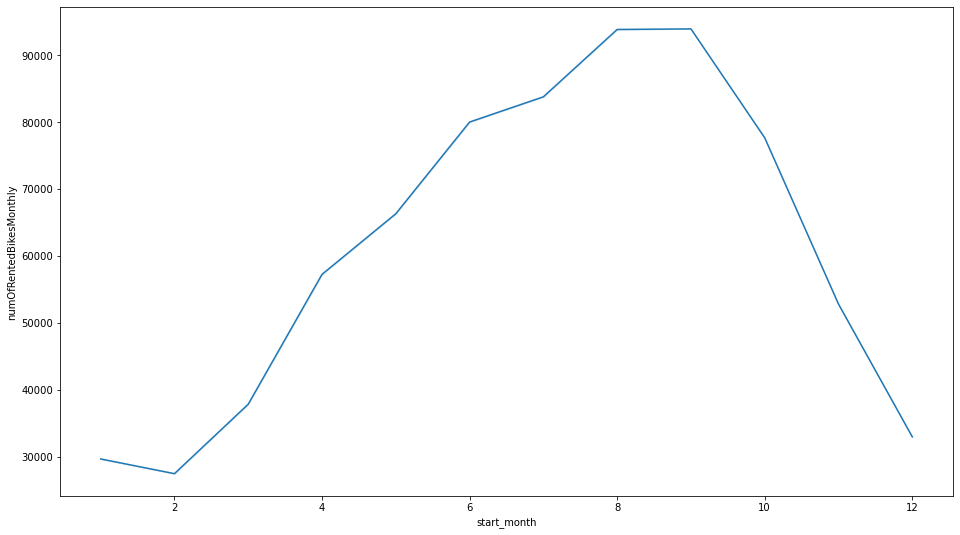

In [14]:
sns.lineplot(x="start_month",y="numOfRentedBikesMonthly",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

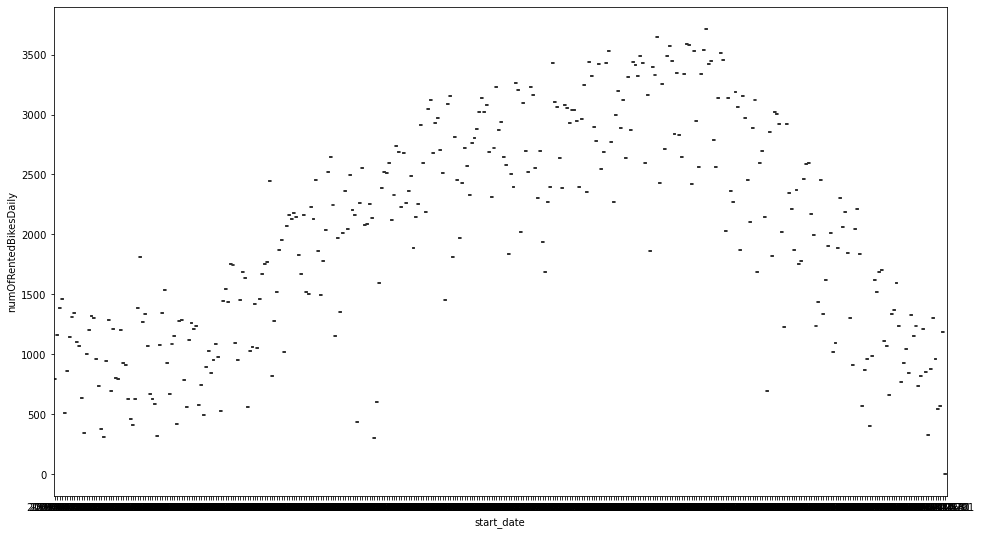

In [12]:
sns.boxplot(x="start_date",y="numOfRentedBikesDaily",data=dfPhiladelphia,palette=palette)
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [ ]:
# Temperaturschwankungen & Bike usage

<AxesSubplot:xlabel='min_temp', ylabel='numOfRentedBikes'>

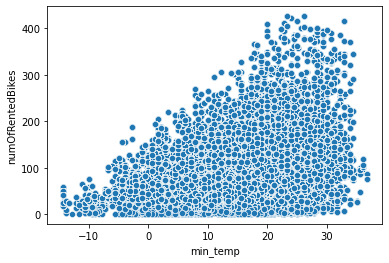

In [26]:
sns.scatterplot(x="min_temp",y="numOfRentedBikes",data=dfPhiladelphia,palette=palette)

## 2.2 Geographical Demand Patterns

In this section, we will:
- Which stations are particularly popular and which are not? 
- Provide a rationale as to why you observe these patterns.

## 2.3 Key Performance Indicators (KPIs)

In this section, we will:
- Define at least (!) three KPIs that you would include in a dashboard for a fleet operators. These KPIs must provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of **utilization**, **revenue**, **coverage** and/or **other business-related aspects**. 
- Briefly explain the rationale behind selecting each KPI, explain why you have chosen it and where needed provide references.
- Calculate hourly values for the selected
- KPIs for the city/year in your dataset and visualize them over time. Which trends do you observe? How do you explain them?

### 2.3.1 KPI: `Utilization`

### 2.3.2 KPI: `Revenue`

### 2.3.3 KPI: `Coverage`

### 2.3.4 KPI: `...`

### 2.3.5 KPI: `...`

### 2.3.6 Dashboard

In [ ]:
#sns.pairplot(tips, 
#             hue="sex", palette="magma",diag_kind ='kde', )
#plt.show()